In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_info = pd.read_csv(r'C:\Users\Sangharsh\Desktop\git\LendingClub\lending_club_info.csv',index_col='LoanStatNew')


In [8]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [9]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [10]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [11]:
feat_info('mort_acc')

Number of mortgage accounts.


In [12]:
df = pd.read_csv(r"C:\Users\Sangharsh\Desktop\git\LendingClub\lending_club_loan_two.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

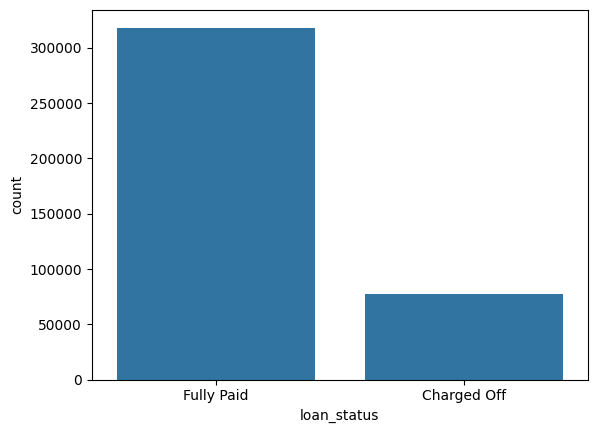

In [15]:
sns.countplot(x='loan_status',data=df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

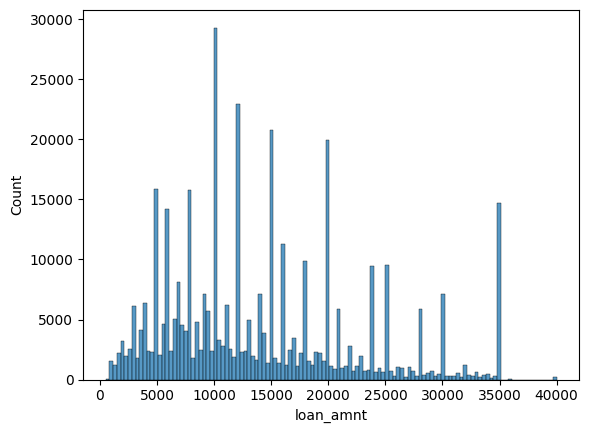

In [16]:
sns.histplot(x='loan_amnt',data=df)

                      loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.05745

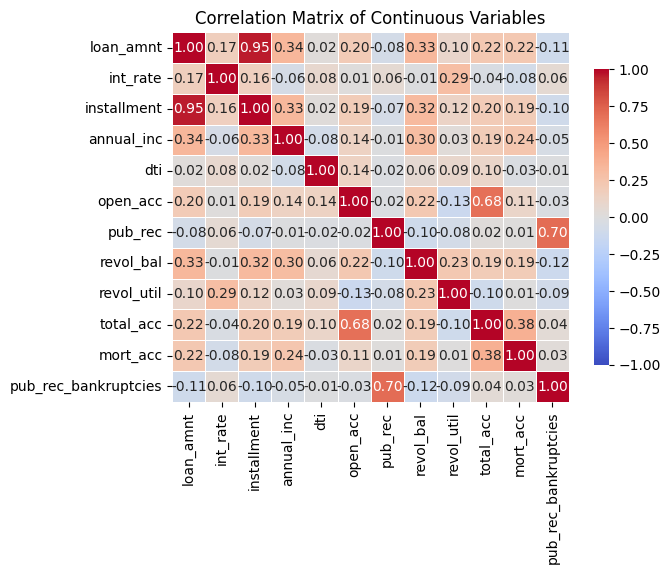

In [19]:
continuous_vars = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = continuous_vars.corr()

print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, fmt=".2f",  
    cmap='coolwarm',  
    vmin=-1, vmax=1,  
    cbar_kws={"shrink": .8},  
    linewidths=.5)

plt.title('Correlation Matrix of Continuous Variables')
plt.show()

<Axes: xlabel='installment', ylabel='loan_amnt'>

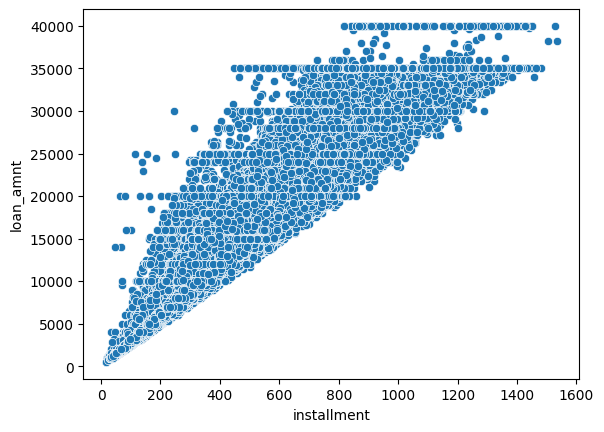

In [20]:
sns.scatterplot(x='installment', y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

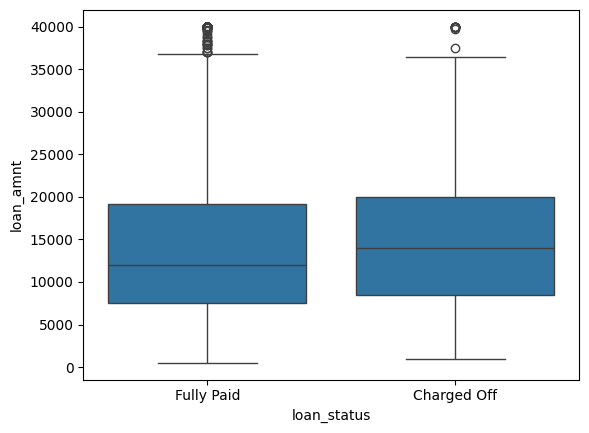

In [21]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [24]:
summary_stats = df.groupby('loan_status')['loan_amnt'].describe()

print(summary_stats)

                count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0  


<Axes: xlabel='grade', ylabel='count'>

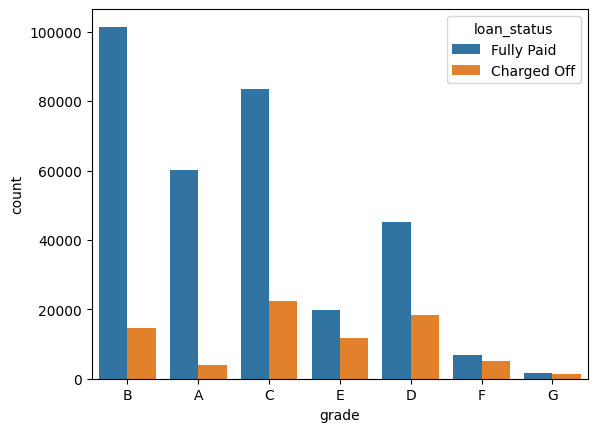

In [25]:
sns.countplot(x='grade',data=df, hue='loan_status')